## Nguyễn Dương - 21521990

### Import thư viện

In [12]:
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

### Nhập và đọc dữ liệu

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1


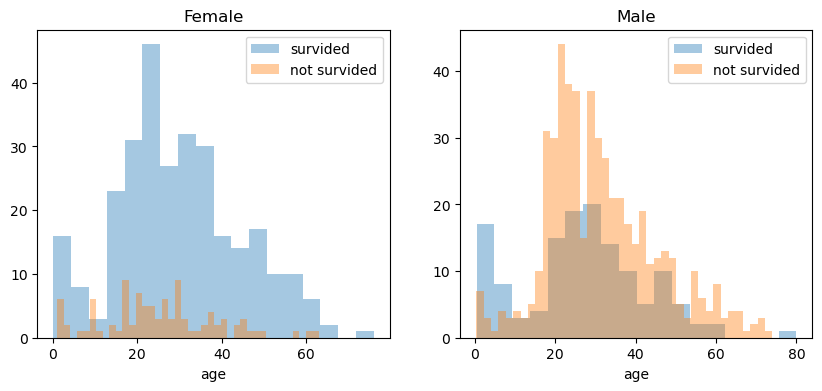

In [14]:
# Xem xét thống kê giữa thuộc tính Độ tuổi (age), Giới tính (sex) và khả năng sống sót (survived)
survived = 'survided'
not_survived ='not survided'
fig, axes = plt.subplots(nrows = 1,ncols =2,figsize = (10,4))
women = df[df['sex']=='female']
men = df[df['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins = 18,label =survived, ax =axes[0],kde = False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins = 40,label =not_survived, ax =axes[0],kde = False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins = 18,label =survived, ax =axes[1],kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins = 40,label =not_survived, ax =axes[1],kde = False)
ax.legend()
_=ax.set_title('Male')

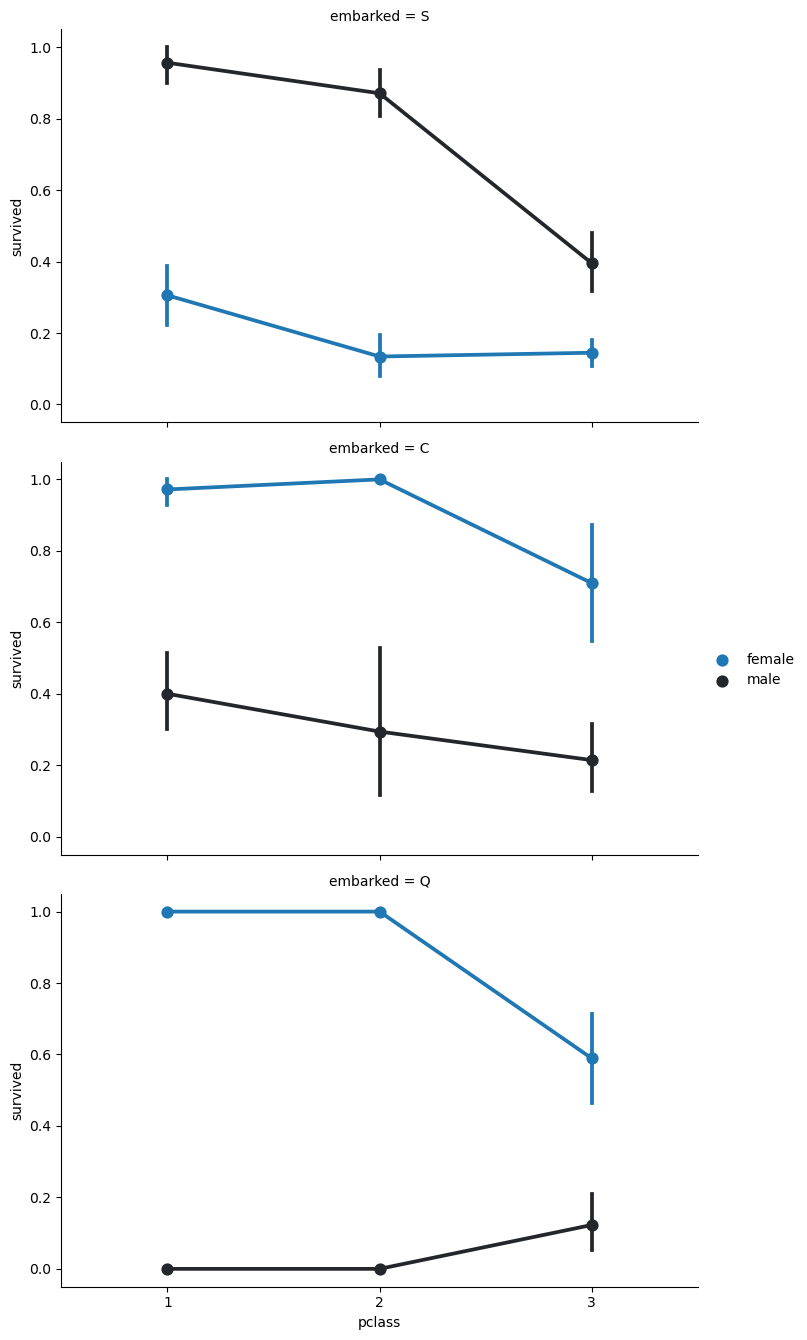

In [15]:
# Xem xét thống kê giữa thuộc tính Cổng lên tàu (embarked) và loại vé (pclass) với
# khả năng sống sót (survived), phân biệt theo Giới tính (sex).
FacetGrid = sns.FacetGrid(df,row='embarked',height =4.5, aspect =1.6)
FacetGrid.map(sns.pointplot,'pclass','survived','sex',palette = None, order =None, hue_order = None)
FacetGrid.add_legend()

<Axes: xlabel='pclass', ylabel='survived'>

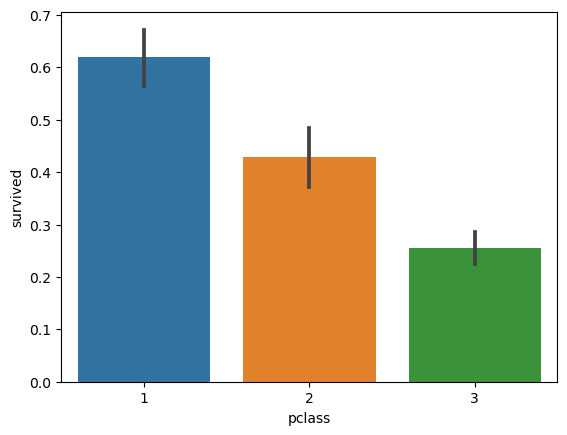

In [16]:
sns.barplot(x='pclass',y='survived',data=df)

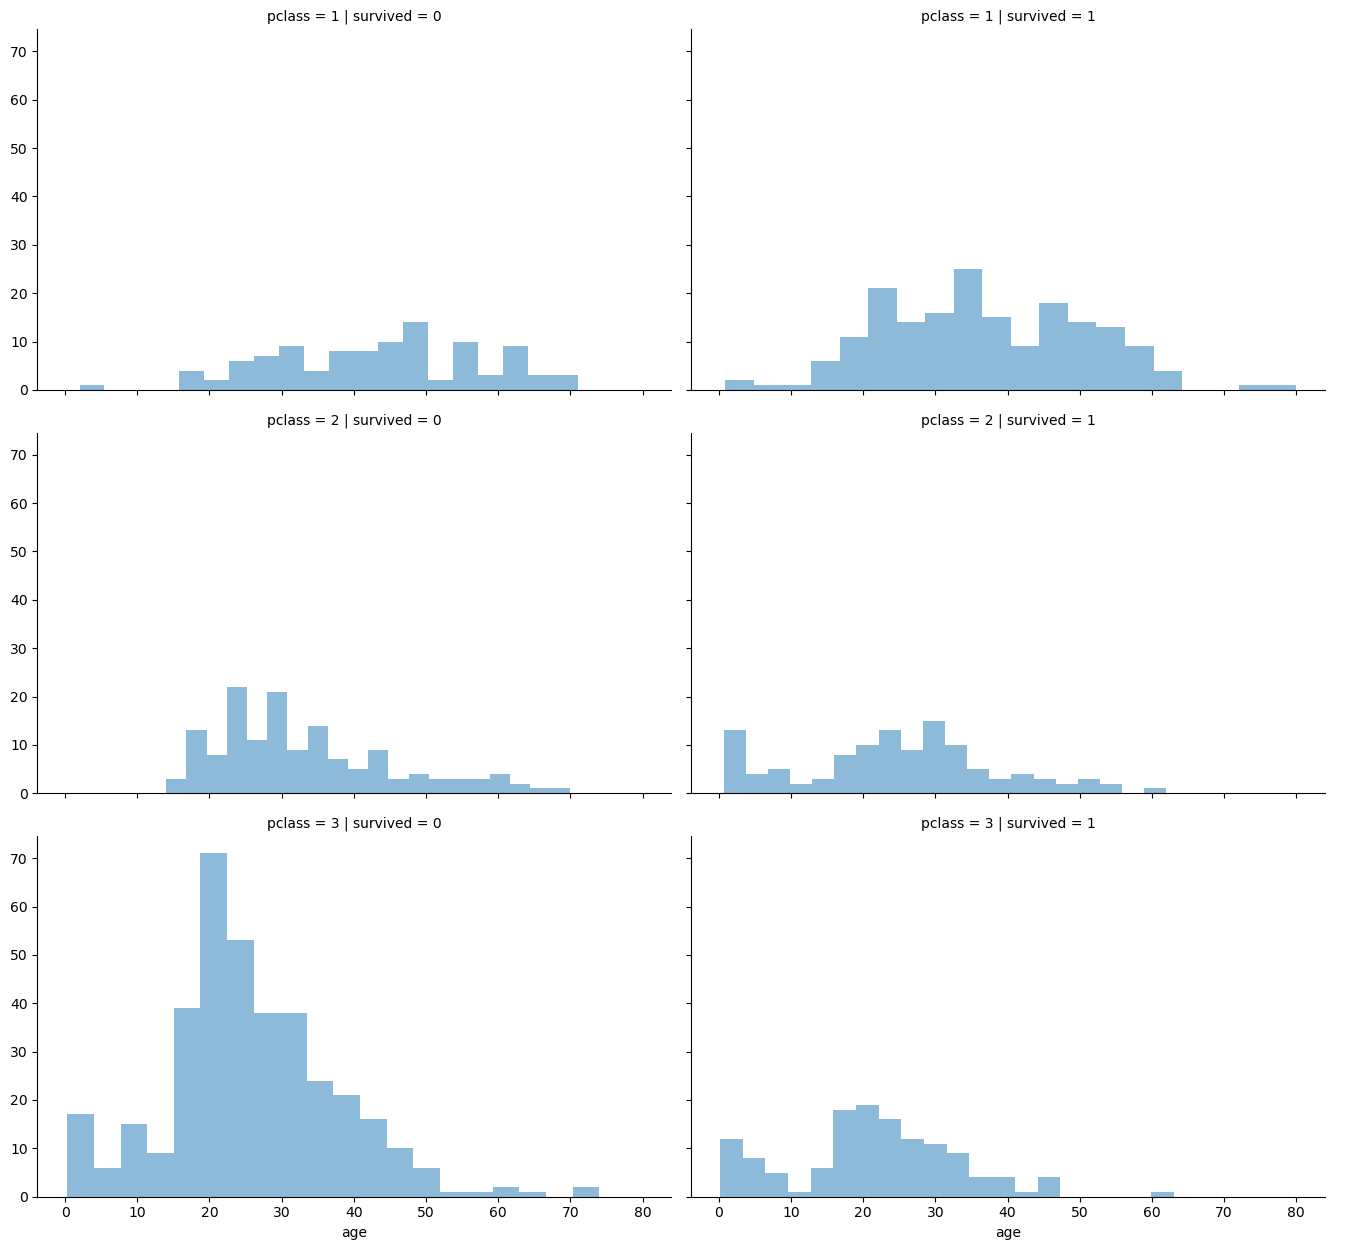

In [19]:
grid = sns.FacetGrid(df,col='survived',row = 'pclass', height =4.2,aspect=1.6)
grid.map(plt.hist,'age',alpha=.5,bins=20)
grid.add_legend()

In [20]:
# Thống kê số người đi cùng (anh chị em/vợ chồng hoặc cha mẹ/con cái)
for dataset in [df]:
    dataset['relatives']= dataset['sibsp']+dataset['parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone']= dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

not_alone
1    790
0    519
Name: count, dtype: int64

Số người đi một mình là 790 người
Số người đi cùng người thân là 519 người

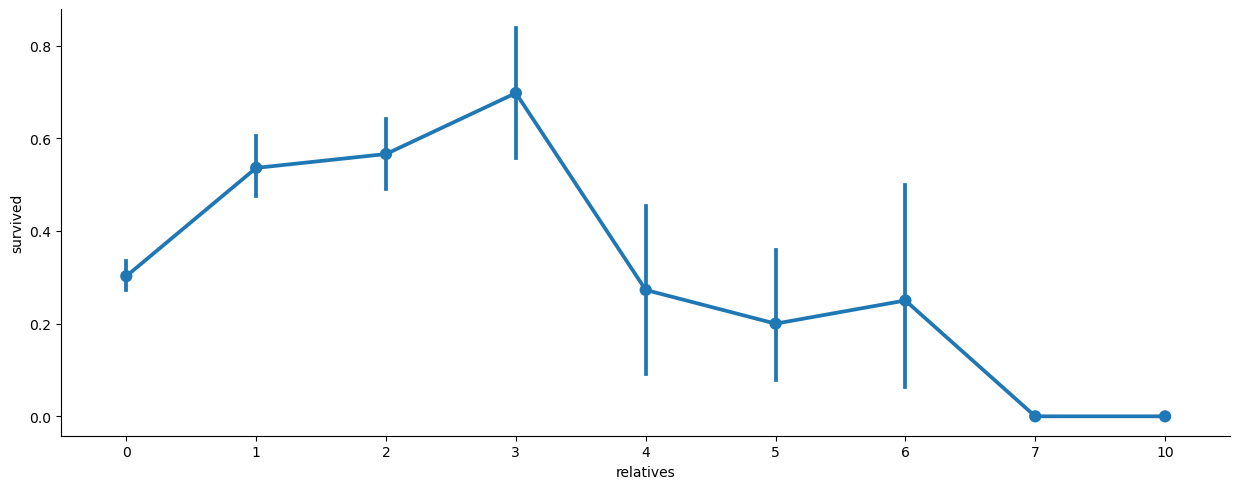

In [27]:
# Vẽ biểu đồ biểu diễn mối quan hệ giữa số người đi cùng và khả năng sống sót
axes = sns.catplot(x = 'relatives',y = 'survived',data=df,aspect=2.5,kind='point',)

Sơ đồ trên cho ta thấy, những người có 1 đến 3 người thân đi cùng có tỉ lệ sống sót cao
hơn. Những người có 7 đến 10 người thân đi cùng thì có tỉ lệ sống thấp nhất.

### Tiền xử lý dữ liệu

In [28]:
import re

deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}

for dataset in [df]:
    dataset['cabin']= dataset['cabin'].fillna("U0") #Điền "U0" vào những ô trống
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z])+").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)
    dataset['deck'] = dataset['deck'].fillna(0)
    dataset['deck'] = dataset['deck'].astype(int) #đổi kiểu dữ liệu int
#drop cabin
df = df.drop(['cabin'],axis =1)

In [29]:
df['ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: ticket, dtype: object

Có thể thấy thuộc tính ticket có đến 929 giá trị khác nhau, có khả năng thuộc tính này sẽ không giúp ích được trong quá trình khai thác, ngược lại còn gây sai số cho thuật toán nên có thể xóa nó đi.

Thực hiện xóa các thuộc tính không cần thiết.

In [30]:
df=df.drop(['ticket'],axis=1)
df= df.drop(['boat'],axis=1)
df=df.drop(['body'],axis=1)
df=df.drop(['home.dest'],axis=1)

Điền giá trị còn thiếu vào thuộc tính tuổi (age).
Các giá trị này sẽ được sinh ngẫu nhiên dựa vào giá trị trung bình, độ lệch chuẩn và số các giá trị còn thiếu.

In [31]:
for dataset in [df]:
    #Tính trung bình tuổi
    mean = df["age"].mean() 
    #Tính độ lệch chuẩn tuổi
    std = df["age"].std() 
    is_null = dataset["age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    #Điền giá trị NAN vào cột tuổi với các giá trị ngẫu nhiên
    age_slice  = dataset["age"].copy()
    age_slice[np.isnan(age_slice)]= rand_age
    dataset["age"]=age_slice
    dataset["age"]=df["age"].astype(int)
df["age"].isnull().sum() 


0

Điền giá trị còn thiếu vào thuộc tính Cổng lên tàu (embarked)
Xem xét thông tin về thuộc tính này

In [32]:
df['embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

Ta thấy, giá trị ‘S’ là phổ biến nhất, nên có thể chọn nó đề điền vào các vị trí còn trống.

In [33]:
common_value='S'

for dataset in [df]:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

 ## Xem lại các thuộc tính

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   int32  
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   fare       1308 non-null   float64
 8   embarked   1309 non-null   object 
 9   relatives  1309 non-null   int64  
 10  not_alone  1309 non-null   int32  
 11  deck       1309 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 107.5+ KB


In [35]:
for dataset in [df]:
    dataset['fare']=dataset['fare'].fillna(0)
    dataset['fare']=dataset['fare'].astype(int)

Đối với thuộc tính tên (name), có thể sẽ trích xuất danh hiệu (title) từ thuộc tính này để xây dựng thuộc tính mới.

In [36]:
titles ={"Mr":1, "Miss":2, "Mrs":3, "Master":4,"Rare":5}

for dataset in [df]:
    dataset['title'] = dataset.name.str.extract('([A-Za-z]+)\.',expand=False)
    dataset['title'] = dataset['title'].replace(['Lady','Countess','Capt','Col','Don','Dr',\
                                                'Major','Rev','Sir','Jonkheer','Done'],'Rare')
    dataset['title'] = dataset['title'].replace('Mlle','Miss')
    dataset['title'] = dataset['title'].replace('Ms','Miss')
    dataset['title'] = dataset['title'].replace('Mme','Mrs')
    #convert
    dataset['title']=dataset['title'].map(titles)
    #filling NaNy with 0
    dataset['title']=dataset['title'].fillna(0)
df =df.drop(['name'],axis=1)

Biểu diễn thuộc tính giới tính (sex) thành các giá trị 0 (nam), 1 (nữ)

In [37]:
genders ={"male":0,"female":1}

for dataset in [df]:
    dataset['sex']=dataset['sex'].map(genders)

Chuyển đổi thuộc tính cổng lên tàu (embarked) thành số

In [38]:
ports = {"S":0,"C":1,"Q":2}

for dataset in [df]:
    dataset['embarked']= dataset['embarked'].map(ports)

Chuyển đổi thuộc tính tuổi (age) về kiểu số nguyên và tạo ra các nhóm tuổi chia giá trị tuổi thành 8 nhóm nhỏ có số lượng hành khách tương đối đều nhau:

- Nhóm 1: dưới 11 tuổi
- Nhóm 2: trên 11 tuổi đến 18 tuổi
- Nhóm 3: trên 18 tuổi đến 22 tuổi
- Nhóm 4: trên 22 tuổi đến 27 tuổi
- Nhóm 5: trên 27 tuổi đến 33 tuổi
- Nhóm 6: trên 33 tuổi đến 40 tuổi
- Nhóm 7: trên 40 tuổi đến 66 tuổi
- Nhóm 8: trên 66 tuổi

In [39]:
for dataset in [df]:
    dataset['age']=dataset['age'].astype(int)
    dataset.loc[dataset['age']<=11,'age']=0
    dataset.loc[(dataset['age']>11) & (dataset['age']<=18),'age']=1
    dataset.loc[(dataset['age']>18) & (dataset['age']<=22),'age']=2
    dataset.loc[(dataset['age']>22) & (dataset['age']<=27),'age']=3
    dataset.loc[(dataset['age']>27) & (dataset['age']<=33),'age']=4
    dataset.loc[(dataset['age']>33) & (dataset['age']<=40),'age']=5
    dataset.loc[(dataset['age']>40) & (dataset['age']<=66),'age']=6
    dataset.loc[dataset['age']>66,'age']=7

 Kết quả đạt được

In [40]:
df['age'].value_counts()

age
6    251
4    242
3    214
5    196
2    171
1    135
0     91
7      9
Name: count, dtype: int64

Đối với thuộc tính giá vé (fare), có thể làm tương tự như đối với thuộc tính tuổi (age). Tuy nhiên, để tránh tình trạng số lượng hành khách tập trung quá nhiều vào một nhóm nào đó, có thể sử dụng hàm qcut() của thư viện sklearn.

In [41]:
for dataset in [df]:
    dataset.loc[dataset['fare']<=7.91,'fare']=0
    dataset.loc[(dataset['fare']>7.91) & (dataset['fare']<=14.454),'fare']=1
    dataset.loc[(dataset['fare']>14.454) & (dataset['fare']<=31),'fare']=2
    dataset.loc[(dataset['fare']>31) & (dataset['fare']<=99),'fare']=3
    dataset.loc[(dataset['fare']>99) & (dataset['fare']<=250),'fare']=4
    dataset.loc[dataset['fare']>250,'fare']=5
    dataset['fare']=dataset['fare'].astype(int)

## Tạo thuộc tính tuổi * loại vé (age_class)

In [42]:

for dataset in [df]:
    dataset['age_class']= dataset['age']*dataset['pclass']

Tạo thuộc tính giá vé trên mỗi người (fare_per_person)

In [43]:
#Thuộc tính giá vé trên mỗi người
for dataset in [df]:
    dataset['fare_per_person']= dataset['fare']/(dataset['relatives']+1)
    dataset['fare_per_person']= dataset['fare_per_person'].astype(int)
df.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,deck,title,age_class,fare_per_person
0,1,1,1,4,0,0,4,0,0,1,2,2.0,4,4
1,1,1,0,0,1,2,4,0,3,0,3,4.0,0,1
2,1,0,1,0,1,2,4,0,3,0,3,2.0,0,1
3,1,0,0,4,1,2,4,0,3,0,3,1.0,4,1
4,1,0,1,3,1,2,4,0,3,0,3,3.0,3,1
5,1,1,0,6,0,0,2,0,0,1,5,1.0,6,2
6,1,1,1,6,1,0,3,0,1,0,4,2.0,6,1
7,1,0,0,5,0,0,0,0,0,1,1,1.0,5,0
8,1,1,1,6,2,0,3,0,2,0,3,3.0,6,1
9,1,0,0,7,0,0,3,1,0,1,8,1.0,7,3
